# CRIS
Classification and Regression for Informed Sampling

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/kylerocha/Documents/GitHub/CRIS')

import data
import classify
import regress

In [94]:
# reload
import importlib
importlib.reload( data )
importlib.reload( classify )
importlib.reload( regress )

<module 'regress' from 'C:\\Users\\OptimusPrimeLord\\Documents\\Summer 2019\\CRIS\\regress.py'>

# TableData
### for data cleaning / sorting

In [3]:
files = ["BH_data/data_-2.500.dat", \
         "BH_data/data_-2.625.dat",
         "BH_data/data_-2.750.dat"]

input_cols = ['log10(M_1i)(Msun)', 'P_i(days)', 'metallicity' ]

output_cols = ['result', 'had_contact', 'M_1f(Msun)', 'M_2f(Msun)', 'P_f(days)', 
               'merge_time(Gyr)', 'Kerr_param_1', 'Kerr_param_2', 
               'he_core_mass_1', 'c_core_mass_1', 'total_mass_h1_1', 
               'total_mass_he4_1', 'he_core_mass_2', 'c_core_mass_2', 
               'total_mass_h1_2', 'total_mass_he4_2']

class_col = 'result' # single colum where we want to id different classes

table_object = data.TableData( files, input_cols, output_cols, 
                               class_col, ignore_lines = 15 )

Reading in data from 3 file(s).
BH_data/data_-2.500.dat
BH_data/data_-2.625.dat
BH_data/data_-2.750.dat
Finished reading data.

Total number of data points: 23055

Input columns: 3
Output columns: 16
Unique classes found in result: 6

Finding values to regress:

Num output(s) 	 Class Name
      1 	 'L2_overflow'
     15 	 'PISN'
      1 	 'ZAMS_L2_overflow'
      0 	 'convergence_error'
     15 	 'double_BH'
      0 	 'off_CHE'


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

import data
import classify
import regress

# reload
import importlib
importlib.reload( data )
importlib.reload( classify )
importlib.reload( regress )



files = ["BH_data/data_-2.500.dat", \
         "BH_data/data_-2.625.dat",
         "BH_data/data_-2.750.dat"]

input_cols = ['log10(M_1i)(Msun)', 'P_i(days)', 'metallicity' ]

output_cols = ['result', 'had_contact', 'M_1f(Msun)', 'M_2f(Msun)', 'P_f(days)', 
               'merge_time(Gyr)', 'Kerr_param_1', 'Kerr_param_2', 
               'he_core_mass_1', 'c_core_mass_1', 'total_mass_h1_1', 
               'total_mass_he4_1', 'he_core_mass_2', 'c_core_mass_2', 
               'total_mass_h1_2', 'total_mass_he4_2']

class_col = 'result' # single colum where we want to id different classes

table_object = data.TableData( files, input_cols, output_cols, 
                               class_col, ignore_lines = 15 )






"""
Takes the data and regressor, returns average relative percent error of regressor
"""
def old_analytical(inp, puredata, regressor):
    #regressor.get_predictions(["rbf"], ["PISN"], ["merge_time(Gyr)"], inp)
    predicted_values = regressor._predict("rbf", "PISN", "merge_time(Gyr)", inp)
    diffs = predicted_values - puredata
    
    where_zero = np.where( puredata == 0 )[0] # 1d array
    where_not_zero = np.where( puredata != 0 )[0] # 1d array
    
    if len(where_zero) > 0:
        percent_diffs = (diffs[where_not_zero] / puredata[where_not_zero])
        #print("%i output with value zero. Omitting for percent change calculation."%(len(where_zero)))
    else:
        percent_diffs = (diffs / puredata)
    
    return np.average(percent_diffs)

def analytical(regressor, regresion, classification, column):
    old_pre = baseline_reg._predict(regresion, classification, column, table_object.get_regr_input_data()[classification].to_numpy(float))
    new_pre = regressor._predict(regresion, classification, column, table_object.get_regr_input_data()[classification].to_numpy(float))
    pure_data = table_object.get_regr_sorted_output_data()[classification][column].to_numpy(float)
    
    old_diffs = new_pre - pure_data
    old_percent_diffs = old_diffs[np.where(pure_data != 0)[0]] / old_pre[np.where(pure_data != 0)[0]]
    new_diffs = old_pre - pure_data
    new_percent_diffs = new_diffs[np.where(pure_data != 0)[0]] / old_pre[np.where(pure_data != 0)[0]]

    return np.average(abs(old_percent_diffs))-np.average(abs(new_percent_diffs))


baseline_reg = regress.Regressor(table_object)
baseline_reg.train("GaussianProcessRegressor", ["PISN"], ["merge_time(Gyr)"],
                   verbose = True, di = np.arange(0, 915, 5))

"""
A value function
"""
def value_func(new_points):
    return reg_value_func(new_points, "GaussianProcessRegressor", "PISN", "merge_time(Gyr)")

def reg_value_func(new_points, regresion, classification, column):
    points = np.unique(np.concatenate((np.arange(0, 915, 5), new_points)).astype(int))
    new_reg = regress.Regressor(table_object)
    new_reg.train(regresion, [classification], [column], verbose = True, di = points)
    return analytical(new_reg, regresion, classification, column)

value_func(np.random.choice(np.arange(0, 915), size=100).astype(int))



Reading in data from 3 file(s).
BH_data/data_-2.500.dat
BH_data/data_-2.625.dat
BH_data/data_-2.750.dat
Finished reading data.

Total number of data points: 23055

Input columns: 3
Output columns: 16
Unique classes found in result: 6

Finding values to regress:

Num output(s) 	 Class Name
      1 	 'L2_overflow'
     15 	 'PISN'
      1 	 'ZAMS_L2_overflow'
      0 	 'convergence_error'
     15 	 'double_BH'
      0 	 'off_CHE'
--- Fit GaussianProcessRegressor ---
PISN: merge_time(Gyr) - 183 training points
POST-fit params:
 {'k1': 96**2, 'k2': RBF(length_scale=[91.1, 225, 4.84]), 'k1__constant_value': 9225.521999972685, 'k1__constant_value_bounds': (100.0, 50000.0), 'k2__length_scale': array([ 91.13894336, 225.08389093,   4.84340386]), 'k2__length_scale_bounds': [(1.0, 1000.0), (1.0, 1000.0), (0.1, 5000.0)]}
--- Done in 0.04 seconds. ---
	dict loc: GaussianProcessRegressor PISN merge_time(Gyr)
	EXIT TRAIN

--- Fit GaussianProcessRegressor ---
PISN: merge_time(Gyr) - 268 training point

-0.06223160717820275

In [6]:
from Optimization_Algorithms import GeneticAlgorithms
#import ParticleSwarm

ModuleNotFoundError: No module named 'Optimization_Algorithms'

In [45]:
table_object.get_regr_sorted_output_data()["PISN"]["merge_time(Gyr)"].to_numpy(float)

array([ 9708.054 , 10186.49  ,  8981.334 ,  9168.072 , 10367.72  ,
       10609.71  ,  8880.548 ,  8690.313 ,  9023.51  ,   316.3492,
         327.6329,   334.0522,   390.0005,   343.0644,   400.8708,
         354.1376,   412.4975,   310.6234,   361.9494,   423.3845,
         490.7058,   318.5375,   373.1723,   437.3188,   504.9998,
         328.2214,   381.8638,   448.8459,   517.1313,   610.9383,
         846.6515,   336.6502,   390.7574,   461.9182,   533.6705,
         627.4913,   863.0752,  1030.452 ,   343.7636,   399.7417,
         470.5301,   544.6594,   642.8814,   754.8438,   893.0007,
        1051.753 ,   351.6494,   411.482 ,   481.8635,   560.0834,
         659.6327,   778.4915,   908.9827,  1079.269 ,   309.4149,
         359.8643,   419.822 ,   491.0894,   574.9829,   678.3893,
         795.8209,   930.7582,  1116.295 ,   315.9119,   367.4298,
         428.7226,   503.2921,   587.3155,   693.6695,   814.749 ,
         962.7268,  1131.456 ,  1380.622 ,   323.595 ,   375.6

In [12]:
regr_obj = regress.Regressor(table_object)
regr_obj.train("rbf", ["double_BH"], ["P_f(days)", "merge_time(Gyr)"],
               verbose = True, di = np.arange(0, 3294, 5))
regr_obj.train("rbf", ["PISN"], ["merge_time(Gyr)"],
               verbose = True, di = np.arange(0, 915, 5))

#rnd_input = regr_obj.get_rnd_test_inputs("double_BH", 5)
#regr_obj.get_predictions(["rbf"], ["double_BH", "PISN"], ["merge_time(Gyr)"], rnd_input)

--- Fit RBF ---
double_BH: P_f(days) - 659 training points
double_BH: merge_time(Gyr) - 659 training points
--- Done in 0.08 seconds. ---
	dict loc: RBF double_BH P_f(days)
	dict loc: RBF double_BH merge_time(Gyr)
	EXIT TRAIN

--- Fit RBF ---
PISN: merge_time(Gyr) - 183 training points
--- Done in 0.00 seconds. ---
	dict loc: RBF PISN merge_time(Gyr)
	EXIT TRAIN



In [23]:
percent_diffs, diffs = regr_obj.cross_validate("rbf", "double_BH", "merge_time(Gyr)", .05)

In [24]:
percent_diffs

array([1116.73105748,  816.67045064,  937.10487248, ...,  179.80699708,
        411.42449345,  591.0692365 ])

In [25]:
diffs

array([ 157.78549959,  126.69221035,  139.23804069, ...,  484.8130668 ,
       1083.29838251, 1521.83542034])

* Gives some diagnostic output for whatever data set you are loading.

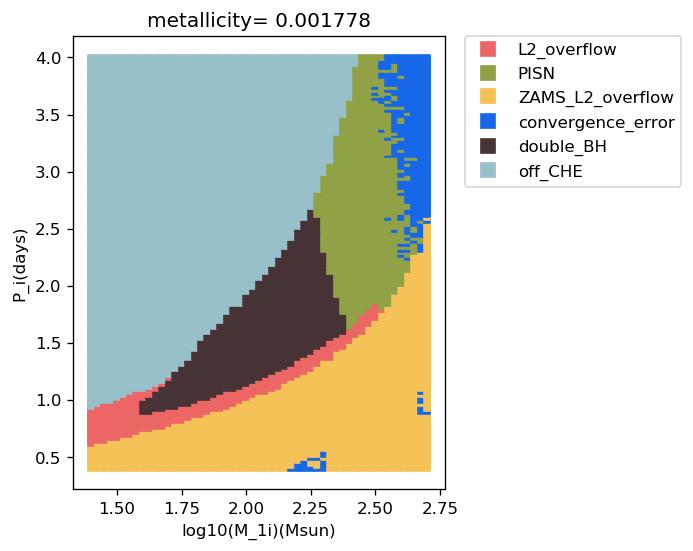

In [4]:
# What does it look like?
table_object.plot_class_data()

* This plotting function is only for 3D input. Have not generalized.

In [5]:
table_object.get_full_data()

array([[1.4, 1.0, 0.4, ..., '-', '-', '-'],
       [1.425, 1.0, 0.4, ..., '-', '-', '-'],
       [1.45, 1.0, 0.4, ..., '-', '-', '-'],
       ...,
       [2.65, 1.0, 4.0, ..., '-', '-', '-'],
       [2.675, 1.0, 4.0, ..., '-', '-', '-'],
       [2.7, 1.0, 4.0, ..., '-', '-', '-']], dtype=object)

In [7]:
table_object.get_full_data(return_df=True)

log10(M_1i)(Msun)  qratio(M_2i/M_1i)  P_i(days)  metallicity  \
df0 0                 1.400                1.0        0.4     0.003162   
    1                 1.425                1.0        0.4     0.003162   
    2                 1.450                1.0        0.4     0.003162   
    3                 1.475                1.0        0.4     0.003162   
    4                 1.500                1.0        0.4     0.003162   
...                     ...                ...        ...          ...   
df2 7680              2.600                1.0        4.0     0.001778   
    7681              2.625                1.0        4.0     0.001778   
    7682              2.650                1.0        4.0     0.001778   
    7683              2.675                1.0        4.0     0.001778   
    7684              2.700                1.0        4.0     0.001778   

                     result had_contact M_1f(Msun) M_2f(Msun) P_f(days)  \
df0 0      ZAMS_L2_overflow           2          -          -         -   
    1      ZAMS_L2_overflow           2          -          -         -   
    2      ZAMS_L2_overflow           2          -          -         -   
    3      ZAMS_L2_overflow           2          -          -         -   
    4      ZAMS_L2_overflow           2          -          -         -   
...                     ...         ...        ...        ...       ...   
df2 7680  convergence_error           -          -          -         -   
    7681  convergence_error           -          -          -         -   
    7682  convergence_error           -          -          -         -   
    7683  convergence_error           -          -          -         -   
    7684  convergence_error           -          -          -         -   

         merge_time(Gyr) Kerr_param_1 Kerr_param_2 he_core_mass_1  \
df0 0                  -            -            -              -   
    1                  -            -            -              -   
    2                  -            -            -              -   
    3                  -            -            -              -   
    4                  -            -            -              -   
...                  ...          ...          ...            ...   
df2 7680               -            -            -              -   
    7681               -            -            -              -   
    7682               -            -            -              -   
    7683               -            -            -              -   
    7684               -            -            -              -   

         c_core_mass_1 total_mass_h1_1 total_mass_he4_1 he_core_mass_2  \
df0 0                -               -                -              -   
    1                -               -                -              -   
    2                -               -                -              -   
    3                -               -                -              -   
    4                -               -                -              -   
...                ...             ...              ...            ...   
df2 7680             -               -                -              -   
    7681             -               -                -              -   
    7682             -               -                -              -   
    7683             -               -                -              -   
    7684             -               -                -              -   

         c_core_mass_2 total_mass_h1_2 total_mass_he4_2  
df0 0                -               -                -  
    1                -               -                -  
    2                -               -                -  
    3                -               -                -  
    4                -               -                -  
...                ...             ...              ...  
df2 7680             -               -                -  
    7681             -               -

# Classification

In [46]:
og_points = np.arange(0, 23055, 10)
baseline_classifier = classify.Classifier(table_object)
baseline_classifier.train("linear", di=og_points)
pred = baseline_classifier.return_class_predictions("linear", table_object.get_input_data())
#baseline_error = np.count_nonzero(class_data == baseline_classifier.return_class_predictions("linear", table_object.get_input_data()))/23055

def analytical(new_points):
    new_classifier = classify.Classifier(table_object)
    collected_points = np.unique(np.concatenate((og_points, new_points)))
    new_classifier.train("linear", di=collected_points)
    pred = new_classifier.return_class_predictions("linear", table_object.get_input_data())
    error = np.count_nonzero(class_data == new_classifier.return_class_predictions("linear", table_object.get_input_data()))/23055
    return (1-baseline_error)/(1-error)

analytical(np.arange(0, 23055, 3))

1.357984994640946

In [59]:
class_data = np.empty((23055))
table_object.get_class_data()
class_data = np.argmax(table_object.get_class_data(), axis=0)
print(class_data)

[2 2 2 ... 3 3 3]


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import sys

import data
import classify
import regress

# reload
import importlib
importlib.reload( data )
importlib.reload( classify )
importlib.reload( regress )


files = ["BH_data/data_-2.500.dat", \
         "BH_data/data_-2.625.dat",
         "BH_data/data_-2.750.dat"]

input_cols = ['log10(M_1i)(Msun)', 'P_i(days)', 'metallicity' ]

output_cols = ['result', 'had_contact', 'M_1f(Msun)', 'M_2f(Msun)', 'P_f(days)', 
               'merge_time(Gyr)', 'Kerr_param_1', 'Kerr_param_2', 
               'he_core_mass_1', 'c_core_mass_1', 'total_mass_h1_1', 
               'total_mass_he4_1', 'he_core_mass_2', 'c_core_mass_2', 
               'total_mass_h1_2', 'total_mass_he4_2']

class_col = 'result' # single colum where we want to id different classes

table_object = data.TableData( files, input_cols, output_cols, 
                               class_col, ignore_lines = 15 )


class_data = np.empty((23055))
table_object.get_class_data()
class_data = np.argmax(table_object.get_class_data(), axis=0)
print(class_data)

def value_of_point(point, pairs):
    """if np.count_nonzero(abs(point[0]*(pairs[:, 0, 1]-pairs[:, 1, 1])
                        +pairs[:, 0, 0]*(pairs[:, 1, 1]-point[1])
                        +pairs[:, 1, 0]*(point[1]-pairs[:, 0, 1])) == 0) != 0:
        print(point)
        for i in range(pairs.shape[0]):
            if abs(point[0]*(pairs[i, 0, 1]-pairs[i, 1, 1])
                        +pairs[i, 0, 0]*(pairs[i, 1, 1]-point[1])
                        +pairs[i, 1, 0]*(point[1]-pairs[i, 0, 1])) == 0:
                raise ValueError(pairs[i])"""
    #need a longterm solution to colinear points... force hight to be >= % * base? Ignore colinearity?
    return np.sum(2/(1+abs(point[0]*(pairs[:, 0, 1]-pairs[:, 1, 1])
                        +pairs[:, 0, 0]*(pairs[:, 1, 1]-point[1])
                        +pairs[:, 1, 0]*(point[1]-pairs[:, 0, 1]))))
    
og_set = np.arange(0, 23055, 25)
og_grid = np.array(np.meshgrid(og_set, og_set)).T.reshape(-1, 2)
og_grid = og_grid[class_data[og_grid[:, 0]] != class_data[og_grid[:, 1]]]
og_grid = table_object.get_input_data()[og_grid][:, :, (0, 1)]

def value_of_set_helper(point, rest):
    og_rest = np.array(np.meshgrid(og_set, np.arange(rest.shape[0]))).T.reshape(-1, 2)
    rest_rest = np.array(np.meshgrid(np.arange(rest.shape[0]), np.arange(rest.shape[0]))).T.reshape(-1, 2)
    this_grid = np.concatenate((og_grid, 
                                np.stack((table_object.get_input_data()[og_rest[:, 0]][:, (0, 1)], 
                                          rest[og_rest[:, 1]]), axis=2),
                                rest[rest_rest]), axis=0)
    return value_of_point(point, this_grid)

def value_of_set(points): #:) for loops are for noobs
    new_points = np.concatenate((points, np.arange(points.shape[0]).T.reshape(points.shape[0], 1)), axis=1)
    adv_points = np.apply_along_axis(lambda x: np.roll(points, x[-1]*points.shape[1]), 1, new_points)#:)
    val = 0
    for i in range(adv_points.shape[0]): #going to require 2 apply along axis, will handle later
        val += value_of_set_helper(adv_points[i][0], adv_points[i][1:])
    return val

Reading in data from 3 file(s).
BH_data/data_-2.500.dat
BH_data/data_-2.625.dat
BH_data/data_-2.750.dat
Finished reading data.

Total number of data points: 23055

Input columns: 3
Output columns: 16
Unique classes found in result: 6

Finding values to regress:

Num output(s) 	 Class Name
      1 	 'L2_overflow'
     15 	 'PISN'
      1 	 'ZAMS_L2_overflow'
      0 	 'convergence_error'
     15 	 'double_BH'
      0 	 'off_CHE'
[2 2 2 ... 3 3 3]


In [57]:
class_data.shape

(23055, 1)

In [325]:
import numpy as np
import matplotlib.pyplot as plt
import sys
#import sklearn

import data
import classify
import regress

# reload
import importlib
importlib.reload( data )
importlib.reload( classify )
importlib.reload( regress )


files = ["BH_data/data_-2.500.dat", \
         "BH_data/data_-2.625.dat",
         "BH_data/data_-2.750.dat"]

input_cols = ['log10(M_1i)(Msun)', 'P_i(days)', 'metallicity' ]

output_cols = ['result', 'had_contact', 'M_1f(Msun)', 'M_2f(Msun)', 'P_f(days)', 
               'merge_time(Gyr)', 'Kerr_param_1', 'Kerr_param_2', 
               'he_core_mass_1', 'c_core_mass_1', 'total_mass_h1_1', 
               'total_mass_he4_1', 'he_core_mass_2', 'c_core_mass_2', 
               'total_mass_h1_2', 'total_mass_he4_2']

class_col = 'result' # single colum where we want to id different classes

table_object = data.TableData( files, input_cols, output_cols, 
                               class_col, ignore_lines = 15 )

class_data = np.argmax(table_object.get_class_data(), axis=0)

og_set = np.arange(0, 23055)
og_inp = table_object.get_input_data()[og_set]
og_table = table_object.get_class_data().T[og_set]

weightings = [1, .10]

def value_of_point(point, rest_points, rest_classes):
    pressure = set_pressure(point[np.newaxis, :], rest_points, rest_classes)[0]
    #print(pressure)
    pure = np.sum(pressure)
    norm = pressure / pure
    #print(norm)
    return (max(1-norm.max(),0))# / pure

def set_pressure(points, input_table, class_table):
    inv_sq_d = 1/np.power(np.minimum(np.sqrt(weightings[0]*np.square(np.repeat(input_table[:, np.newaxis, 0], 
                                                                               points.shape[0], axis=1) - points[:, 0])+
                                             weightings[1]*np.square(np.repeat(input_table[:, np.newaxis, 1], 
                                                                               points.shape[0], axis=1) - points[:, 1])),
                                     .4),
                          2)
    return np.tensordot(inv_sq_d, class_table, axes=(0, 0))
    
def value_of_set_helper(point, rest):
    pressure_values = set_pressure(rest, og_inp, og_table)
    prob_vals = np.divide(pressure_values, np.repeat(np.sum(pressure_values, axis=1)[:, np.newaxis], pressure_values.shape[1], axis=1))
    val = 0
    for _ in range(1):
        rd_vals = np.apply_along_axis(lambda x: np.random.choice(np.arange(0, og_table.shape[1]), p=x), 1,
                                     prob_vals)
        rest_vals = np.zeros((rest.shape[0], og_table.shape[1]))
        rest_vals[np.arange(0, rest_vals.shape[0]), rd_vals] = 1
        val += value_of_point(point,
                              np.concatenate((og_inp[:, (0, 1)], rest), axis=0),
                              np.concatenate((og_table, rest_vals), axis=0))
    return val
    
def value_of_set(points): #:) for loops are for noobs
    #print(points)
    new_points = np.concatenate((points, np.arange(points.shape[0]).T.reshape(points.shape[0], 1)), axis=1)
    #print(new_points)
    #adv_points = np.apply_along_axis(lambda x: print(x), 1, new_points)#:) np.roll(points, x[-1]*points.shape[1])
    #adv_points = np.apply_along_axis(lambda x: np.roll(points, x*points.shape[1]), 0, np.arange(points.shape[0]))
    adv_points = np.empty((points.shape[0], points.shape[0], points.shape[1]))
    for i in range(points.shape[0]):
        adv_points[i] = np.roll(points, i*(points.shape[1]))
    #print(adv_points)
    #raise ValueError("EE")
    val = 0
    for i in range(adv_points.shape[0]): #going to require 2 apply along axis, will handle later
        val += value_of_set_helper(adv_points[i][0], adv_points[i][1:])
    return val

value_of_point(np.array([2.311, 2.7]), og_inp, og_table)

Reading in data from 3 file(s).
BH_data/data_-2.500.dat
BH_data/data_-2.625.dat
BH_data/data_-2.750.dat
Finished reading data.

Total number of data points: 23055

Input columns: 3
Output columns: 16
Unique classes found in result: 6

Finding values to regress:

Num output(s) 	 Class Name
      1 	 'L2_overflow'
     15 	 'PISN'
      1 	 'ZAMS_L2_overflow'
      0 	 'convergence_error'
     15 	 'double_BH'
      0 	 'off_CHE'


0.5630951403039124

In [322]:
print(table_object.get_class_names())

['L2_overflow' 'PISN' 'ZAMS_L2_overflow' 'convergence_error' 'double_BH'
 'off_CHE']


Progress: [####################] 99.9%


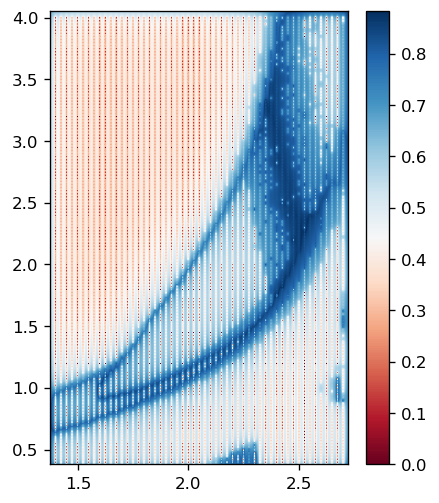

In [323]:
#dx, dy = .02, .02
dx, dy = .0025, .0025
#dx, dy = .001, .001
y, x = np.mgrid[slice(.38, 4.05 + dy, dy),
                slice(1.375, 2.72 + dx, dx)]

con = np.concatenate((x[:, :, np.newaxis], y[:, :, np.newaxis]), axis=2)
z = np.empty((con.shape[0], con.shape[1]))
for i in range(con.shape[0]):
    update_progress(i/con.shape[0])
    for j in range(con.shape[1]):
        val = value_of_point(np.array(con[i, j]), og_inp, og_table)
        z[i, j] = math.pow(val, .5)
        
plt.figure(figsize=(4,5), dpi=120)
plt.pcolormesh(x, y, z, cmap='RdBu')
plt.colorbar()

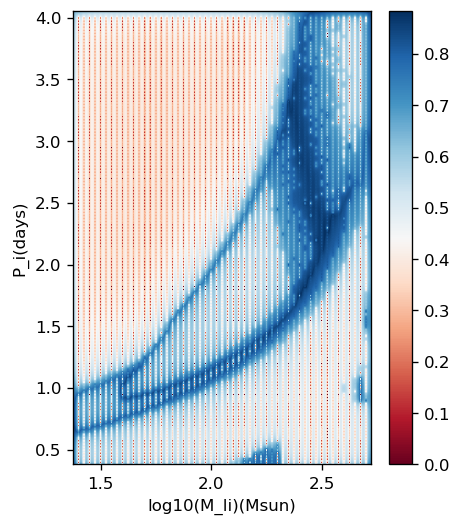

In [327]:
plt.figure(figsize=(4,5), dpi=120)
plt.pcolormesh(x, y, z, cmap='RdBu')
plt.xlabel("log10(M_li)(Msun)")
plt.ylabel("P_i(days)")
plt.colorbar()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

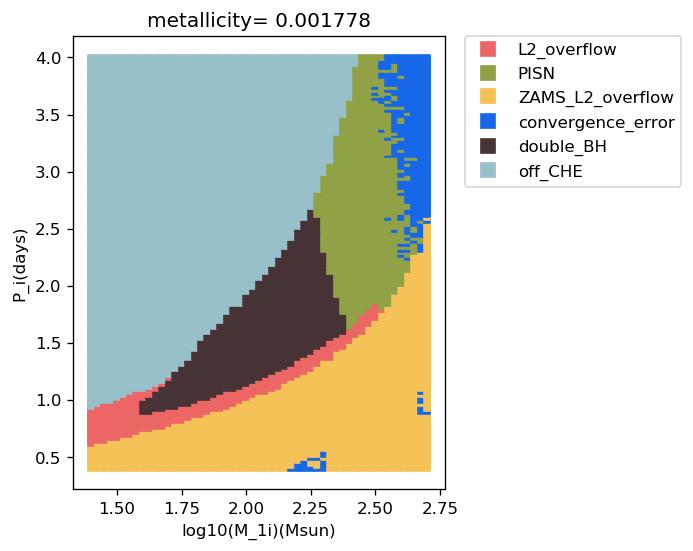

In [309]:
table_object.plot_class_data()

In [285]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [129]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([[1], [1], [1]])
print(B.shape)
np.tensordot(B, A, axes=(0, 0))
print(A[:, np.newaxis, 0])

(3, 2)
(3, 1)
[[1]
 [3]
 [5]]


In [172]:
A = np.array([1, 2])
A[np.newaxis, :]

array([[1, 2]])

In [36]:
import copy
class_data_save = copy.deepcopy(class_data)

In [26]:
np.argmax(table_object.get_class_data()[:, 1])

2

In [6]:
classifier_obj = classify.Classifier( table_object )

In [7]:
classifier_obj.train( "linear", di=np.arange(0,23055,10), verbose = True )
classifier_obj.train(    "rbf", di=np.arange(0,23055,10), verbose = True )
classifier_obj.train(     "gp", di=np.arange(0,23055,50), verbose = True )
# di = data interval
# indicies in data array to use for training

N points: 2306
Time to fit 6 classifiers ~ 1.047

LinearNDInterpolator class 0 -- current time: 0.175
LinearNDInterpolator class 1 -- current time: 0.344
LinearNDInterpolator class 2 -- current time: 0.513
LinearNDInterpolator class 3 -- current time: 0.679
LinearNDInterpolator class 4 -- current time: 0.840
LinearNDInterpolator class 5 -- current time: 0.990
	dict loc: LinearNDInterpolator L2_overflow
	dict loc: LinearNDInterpolator PISN
	dict loc: LinearNDInterpolator ZAMS_L2_overflow
	dict loc: LinearNDInterpolator convergence_error
	dict loc: LinearNDInterpolator double_BH
	dict loc: LinearNDInterpolator off_CHE
Done training LinearNDInterpolator.
N points: 2306
Time to fit 6 classifiers ~ 2.705

RBF class 0 -- current time: 0.451
RBF class 1 -- current time: 0.897
RBF class 2 -- current time: 1.344
RBF class 3 -- current time: 1.804
RBF class 4 -- current time: 2.257
RBF class 5 -- current time: 2.703
	dict loc: RBF L2_overflow
	dict loc: RBF PISN
	dict loc: RBF ZAMS_L2_overflow
	

In [8]:
classifier_obj._interpolators_.keys()

dict_keys(['LinearNDInterpolator', 'RBF', 'GaussianProcessClassifier'])

In [9]:
classifier_obj._interpolators_["LinearNDInterpolator"]["double_BH"]

In [10]:
classifier_obj._interpolators_["RBF"]["PISN"]

### After training you can predict classes given an input.

In [14]:
# generate N random inputs within range of data
rnd_input = classifier_obj.get_rnd_test_inputs(5)
print(rnd_input)

[[1.61542578e+00 1.81869033e+00 3.00769368e-03]
 [2.34358273e+00 3.28869172e+00 2.55326029e-03]
 [2.55649196e+00 3.11575396e+00 1.96306492e-03]
 [1.59164974e+00 1.57491547e+00 2.21155567e-03]
 [2.40378053e+00 3.58980601e+00 3.03066249e-03]]


In [15]:
class_ids = classifier_obj.return_class_predictions( "rbf", rnd_input )

print(class_ids)
print( [ table_object.class_id_mapping[i] for i in class_ids ] )

[5 4 1 5 4]
['off_CHE', 'double_BH', 'PISN', 'off_CHE', 'double_BH']


In [11]:
N_points = 2600
rnd_input = classifier_obj.get_rnd_test_inputs( N_points )

tester_class_results_linear, probs_lin = classifier_obj.return_class_predictions( "linear", 
                                                                        rnd_input,
                                                                        return_probs=True )

tester_class_results_rbf, probs_rbf  = classifier_obj.return_class_predictions( "rbf",
                                                                        rnd_input,
                                                                        return_probs=True )

tester_class_results_gp, probs_gp  = classifier_obj.return_class_predictions( "gp",
                                                                        rnd_input,
                                                                        return_probs=True )

Nans
Nans
Nans
Nans
Nans
Nans


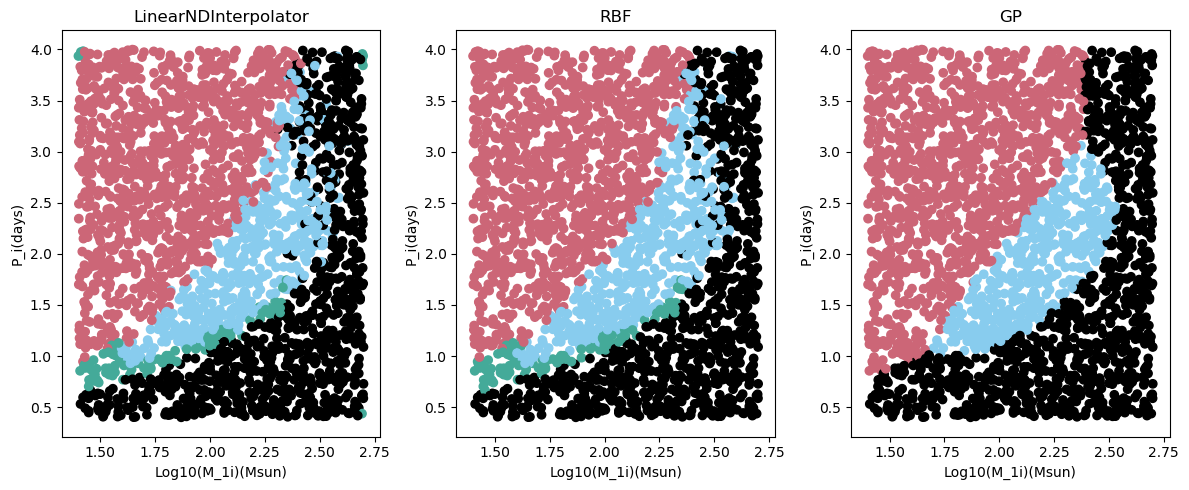

In [12]:
fig, subs = plt.subplots(1,3, dpi=100, figsize=(12,5))

color_dict = { 0:"#44AA99", 1:"#88CCEE", 2:"k", 3:"k", 4:"#88CCEE", 5:"#CC6677", 6:"C6" }

colors1 = [color_dict[ tester_class_results_linear[i] ] for i in range(len(tester_class_results_linear))]
colors2 = [color_dict[ tester_class_results_rbf[i] ] for i in range(len(tester_class_results_linear))]
colors3 = [color_dict[ tester_class_results_gp[i] ] for i in range(len(tester_class_results_linear))]

subs[0].scatter(rnd_input.T[0], rnd_input.T[1], c = colors1 )
subs[0].set_title("LinearNDInterpolator")
subs[1].scatter(rnd_input.T[0], rnd_input.T[1], c = colors2 )
subs[1].set_title("RBF")
subs[2].scatter(rnd_input.T[0], rnd_input.T[1], c = colors3 )
subs[2].set_title("GP")

for i in range(3):
    subs[i].set_xlabel("Log10(M_1i)(Msun)")
    subs[i].set_ylabel("P_i(days)")
    
fig.tight_layout(w_pad=1)
plt.show()

In [57]:
#table_object.plot_class_data()

### Cross Validation

In [13]:
classifier_obj.cross_validate( ["rbf"], 0.04, verbose=True)

alpha: 0.040000, num_training_points 922

Interp 	 percent correct
------   ----------------
rbf 	 86.974201


(array([86.97420142]), [1.5611588954925537])

# Regression

In [16]:
regr_obj = regress.Regressor( table_object )

print( regr_obj.regr_dfs_per_class.keys() )
print( regr_obj.regr_dfs_per_class["convergence_error"] )

dict_keys(['L2_overflow', 'PISN', 'ZAMS_L2_overflow', 'convergence_error', 'double_BH', 'off_CHE'])
nan


Plotting all regression data from class 'double_BH'.


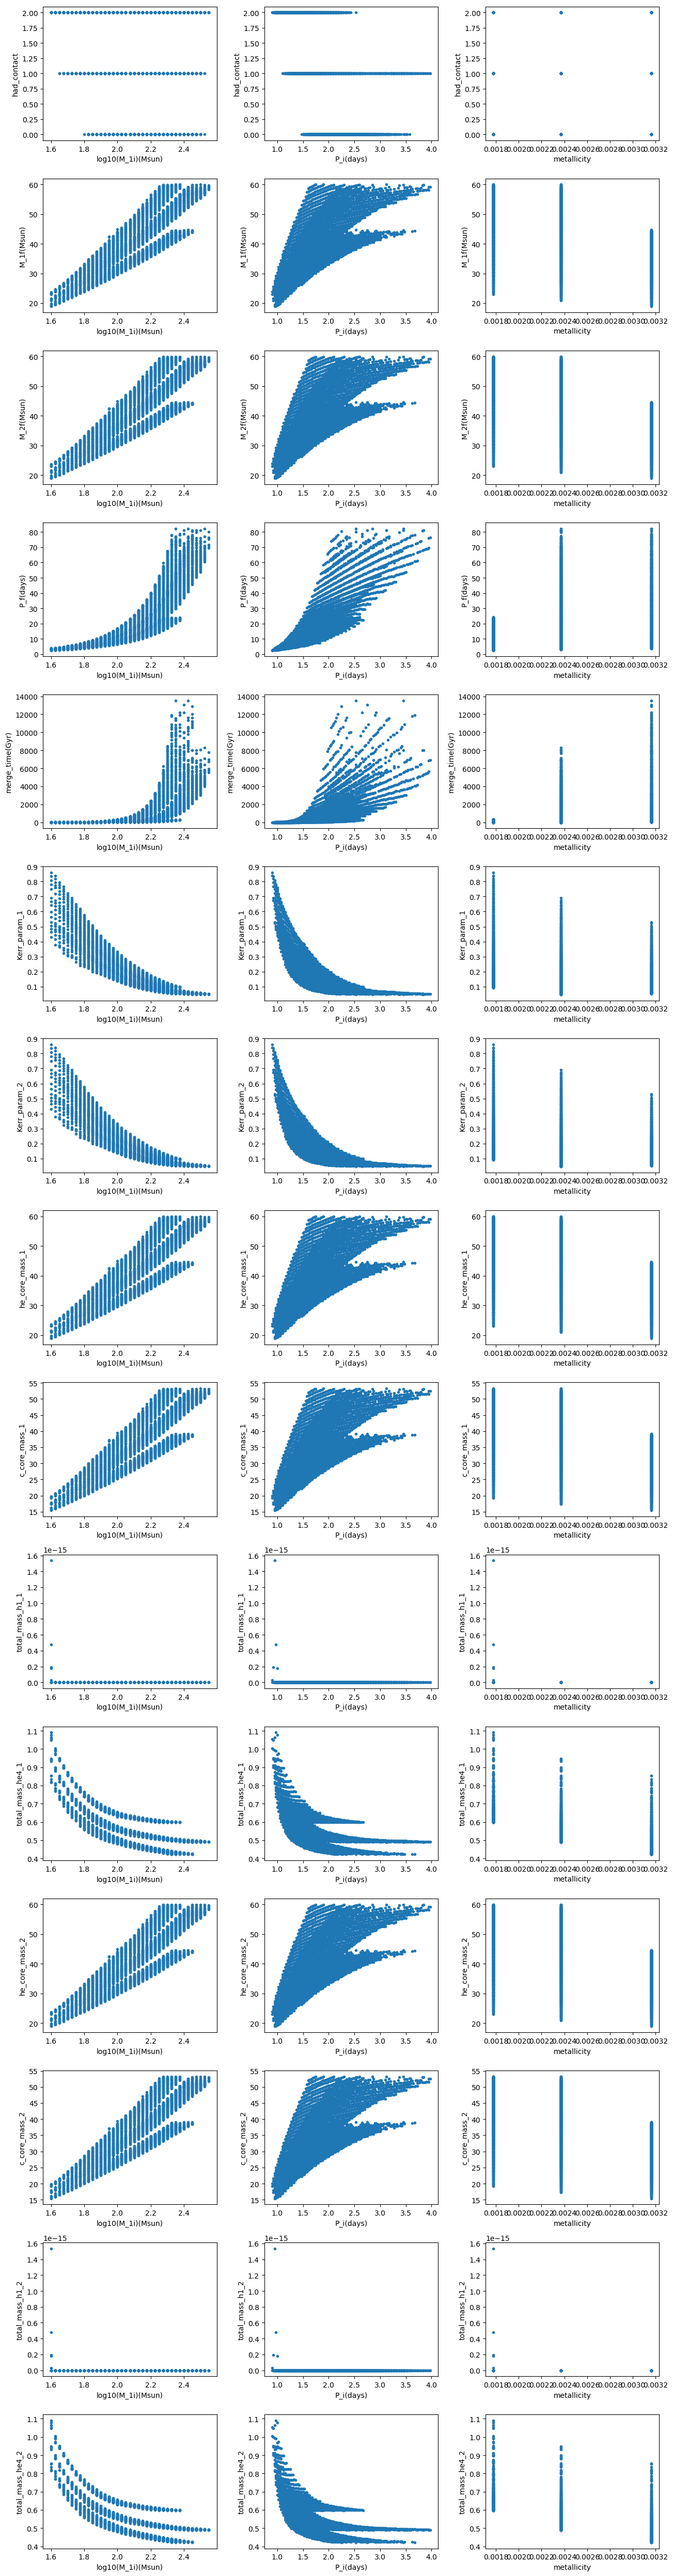

In [116]:
# What does the data look like?
regr_obj.plot_data("double_BH")

In [17]:
regr_obj.train( "rbf", ["double_BH"], ["P_f(days)", "merge_time(Gyr)"],
               verbose = True, di = np.arange(0, 3294, 5) ) 

--- Fit RBF ---
double_BH: P_f(days) - 659 training points
double_BH: merge_time(Gyr) - 659 training points
--- Done in 0.62 seconds. ---
	dict loc: RBF double_BH P_f(days)
	dict loc: RBF double_BH merge_time(Gyr)
	EXIT TRAIN



In [18]:
regr_obj.train( "rbf", ["PISN"], ["merge_time(Gyr)"],
               verbose = True, di = np.arange(0, 915, 5) ) 

--- Fit RBF ---
PISN: merge_time(Gyr) - 183 training points
--- Done in 0.03 seconds. ---
	dict loc: RBF PISN merge_time(Gyr)
	EXIT TRAIN



### This is the setup $\rightarrow$ Regressor : Class : [ output (column), ... ]

In [19]:
regr_obj._regressors_

defaultdict(<function regress.makehash()>,
            {'RBF': defaultdict(<function regress.makehash()>,
                         {'double_BH': defaultdict(<function regress.makehash()>,
                                      {'P_f(days)': <scipy.interpolate.rbf.Rbf at 0x1a1ca72780>,
                                       'merge_time(Gyr)': <scipy.interpolate.rbf.Rbf at 0x1a1c430f98>}),
                          'PISN': defaultdict(<function regress.makehash()>,
                                      {'merge_time(Gyr)': <scipy.interpolate.rbf.Rbf at 0x1a1ca72278>})})})

### After training you can predict.

In [21]:
rnd_input = regr_obj.get_rnd_test_inputs("double_BH", 5)

print(rnd_input)

[[1.63857492e+00 2.98912843e+00 2.94403481e-03]
 [2.49617990e+00 1.83357564e+00 2.85100411e-03]
 [2.43594112e+00 2.35613400e+00 2.61286501e-03]
 [2.48376057e+00 2.22266351e+00 2.61896064e-03]
 [2.36854108e+00 1.26047874e+00 2.49338644e-03]]


In [22]:
regr_obj.get_predictions( ["rbf"], ["double_BH", "PISN"], ["merge_time(Gyr)"], rnd_input   )

{'RBF': {'double_BH': {'merge_time(Gyr)': array([4614.28343523, 2426.89448357, 1694.96197319, 3145.7584281 ,
          1059.31611633])},
  'PISN': {'merge_time(Gyr)': array([-496.21158576, 1113.46948791, 1549.79615062, 1527.16044509,
          1372.57341576])}}}

In [105]:
# get_predictions() assumes all classes have the specified columns
#regr_obj.get_predictions( ["rbf"], ["double_BH"], ["P_f(days)"], rnd_input   )

---------

## I.S.


Reading in data from 3 file(s).
BH_data/data_-2.500.dat
BH_data/data_-2.625.dat
BH_data/data_-2.750.dat
Finished reading data.

--Using Subset--
0.50 percent of total data set.
Total number of data points: 116

Input columns: 3
Output columns: 16
Unique classes found in result: 6

Finding values to regress:

Num output(s) 	 Class Name
      1 	 'L2_overflow'
     15 	 'PISN'
      1 	 'ZAMS_L2_overflow'
      0 	 'convergence_error'
     15 	 'double_BH'
      0 	 'off_CHE'


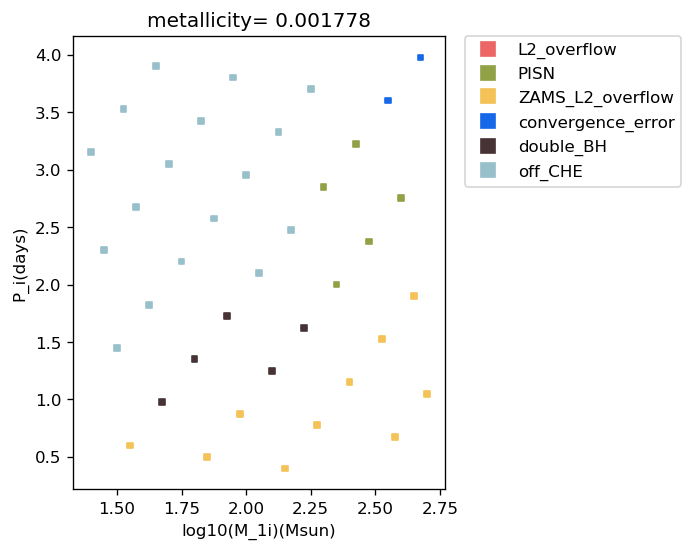

In [109]:
table_object = data.TableData( files, input_cols, output_cols, 
                               class_col, ignore_lines = 15, subset_interval = 200 )

# First we need to start with a subset of the data.
# 
table_object.plot_class_data( which_val = 0 )

In [124]:
classify_obj = classify.Classifier( table_object )

classify_obj.train( "linear", di = None, verbose = True )
classify_obj.train('rbf', di = None, verbose = True)
classify_obj.train('gp', di = None, verbose = True)

N points: 193
Time to fit 6 classifiers ~ 0.082

LinearNDInterpolator class 0 -- current time: 0.014
LinearNDInterpolator class 1 -- current time: 0.020
LinearNDInterpolator class 2 -- current time: 0.024
LinearNDInterpolator class 3 -- current time: 0.030
LinearNDInterpolator class 4 -- current time: 0.035
LinearNDInterpolator class 5 -- current time: 0.040
	dict loc: LinearNDInterpolator L2_overflow
	dict loc: LinearNDInterpolator PISN
	dict loc: LinearNDInterpolator ZAMS_L2_overflow
	dict loc: LinearNDInterpolator convergence_error
	dict loc: LinearNDInterpolator double_BH
	dict loc: LinearNDInterpolator off_CHE
Done training LinearNDInterpolator.
N points: 193
Time to fit 6 classifiers ~ 0.037

RBF class 0 -- current time: 0.006
RBF class 1 -- current time: 0.009
RBF class 2 -- current time: 0.011
RBF class 3 -- current time: 0.014
RBF class 4 -- current time: 0.017
RBF class 5 -- current time: 0.019
	dict loc: RBF L2_overflow
	dict loc: RBF PISN
	dict loc: RBF ZAMS_L2_overflow
	di

In [125]:
ranges = []
for key in table_object.input_.keys():
    full_data = table_object.full_data[key]
    this_max, this_min = max(full_data), min(full_data)
    print( "%f, %f \t %s"%(this_min, this_max, key) )
    ranges.append( (this_min,this_max) )

N = 100
axis_1 = np.linspace( 1.4, 2.7, N )
axis_2 = np.linspace( 0.4, 4.0, N )
axis_3 = np.array( [1923]*N )

plot_points = []
prob_points = []
for ax1 in axis_1:
    for ax2 in axis_2:
        plot_points.append( [ax1, ax2] )
        
        prob_points.append( [ax1, ax2, ax3] )

plot_points = np.array(plot_points)
prob_points = np.array(prob_points)


tester_class_results_linear, probs_lin  = classify_obj.return_class_predictions( "rbf",
                                                                          prob_points,
                                                                          return_probs=True )

tester_class_results_gp, probs_gp  = classify_obj.return_class_predictions( "gp",
                                                                          prob_points,
                                                                          return_probs=True )
print("DONE")

1.400000, 2.700000 	 log10(M_1i)(Msun)
0.400000, 4.000000 	 P_i(days)
0.001778, 0.003162 	 metallicity
DONE


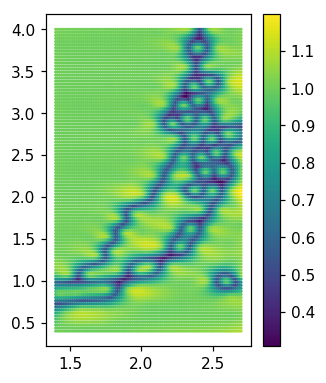

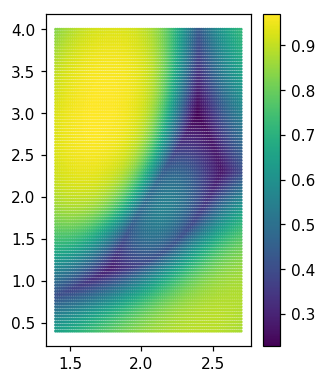

In [126]:
plt.figure(figsize=(3,4), dpi=110)
plt.scatter( plot_points.T[0], plot_points.T[1], c = np.max(probs_lin, axis=1), s = 1 )
plt.colorbar()
plt.show()

plt.figure(figsize=(3,4), dpi=110)
plt.scatter( plot_points.T[0], plot_points.T[1], c = np.max(probs_gp, axis=1), s = 1 )
plt.colorbar()
plt.show()

89


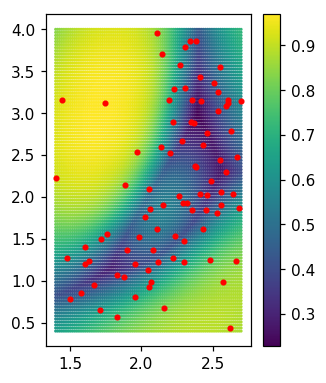

In [170]:
N_ = 300
test_input = classify_obj.get_rnd_test_inputs(N_)

class_probs = classify_obj.return_probs("gp", test_input, all_probs=True)

max_probs = np.max( class_probs, axis=1 )

#print(max_probs)

random_numbers = np.random.rand( N_ )

#print(random_numbers)

accept = np.where(random_numbers > max_probs)[0]
#reject = np.where(random_numbers > max_probs)[0]
                
accepted_inputs = test_input[ accept ]
print( len(accepted_inputs) )

# gp
plt.figure(figsize=(3,4), dpi=110)
plt.scatter( plot_points.T[0], plot_points.T[1], c = np.max(probs_gp, axis=1), s = 1 )
plt.colorbar()
plt.plot( accepted_inputs.T[0], accepted_inputs.T[1], 'r.',  )
plt.show()

# rbf
# plt.figure(figsize=(3,4), dpi=110)
# plt.scatter( plot_points.T[0], plot_points.T[1], c = np.max(probs_lin, axis=1), s = 1 )
# plt.colorbar()
# plt.plot( accepted_inputs.T[0], accepted_inputs.T[1], 'r.',  )
# plt.show()


In [148]:
#%%timeit
N_points = 2600
rnd_input = classify_obj.get_rnd_test_inputs( N_points )

tester_class_results_linear, probs_lin  = classify_obj.return_class_predictions( "linear",
                                                                          rnd_input,
                                                                          return_probs=True )
#print( rnd_input )
#print( tester_class_results_linear )
#print( probs_lin )


tester_class_results_rbf, probs_rbf  = classify_obj.return_class_predictions( "rbf",
                                                                          rnd_input,
                                                                          return_probs=True )
#print( tester_class_results_rbf )
#print( probs )
#print( np.sum( probs, axis = 1) )


tester_class_results_gp, probs_gp  = classify_obj.return_class_predictions( "gp",
                                                                          rnd_input,
                                                                          return_probs=True )

#print( tester_class_results_rbf )
#print( probs )
#print( np.sum( probs, axis = 1) )

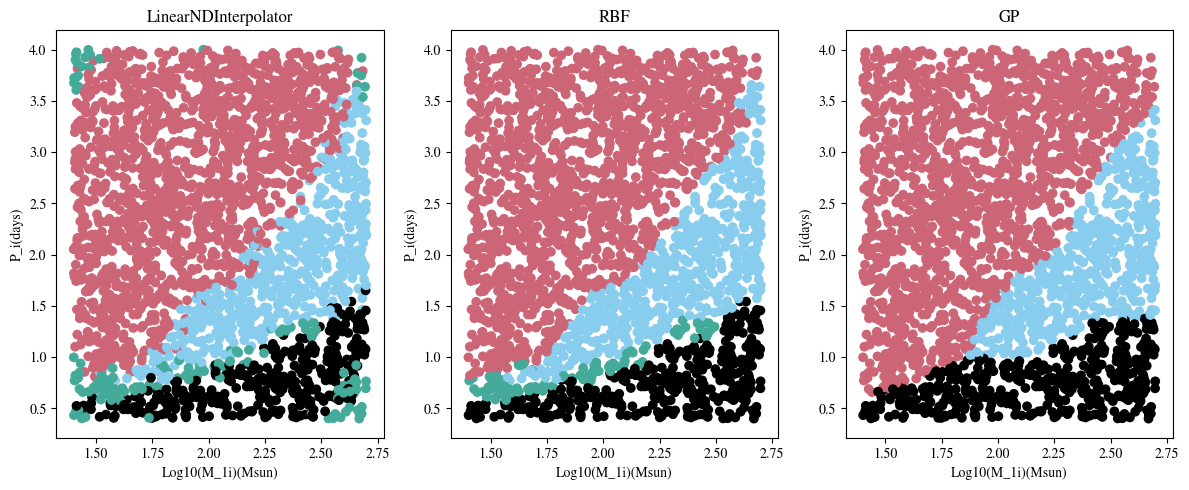

In [151]:
import matplotlib.pyplot as plt

fig, subs = plt.subplots(1,3, dpi=100, figsize=(12,5))

color_dict = { 0:"#44AA99", 1:"#88CCEE", 2:"k", 3:"k", 4:"#88CCEE", 5:"#CC6677", 6:"C6" }
# k
# #CC6677
# #44AA99
# #88CCEE

colors1 = [color_dict[ tester_class_results_linear[i] ] for i in range(len(tester_class_results_linear))]
colors2 = [color_dict[ tester_class_results_rbf[i] ] for i in range(len(tester_class_results_linear))]
colors3 = [color_dict[ tester_class_results_gp[i] ] for i in range(len(tester_class_results_linear))]

subs[0].scatter(rnd_input.T[0], rnd_input.T[1], c = colors1 )
subs[0].set_title("LinearNDInterpolator")
subs[1].scatter(rnd_input.T[0], rnd_input.T[1], c = colors2 )
subs[1].set_title("RBF")
subs[2].scatter(rnd_input.T[0], rnd_input.T[1], c = colors3 )
subs[2].set_title("GP")


subs[0].set_xlabel("Log10(M_1i)(Msun)")
subs[0].set_ylabel("P_i(days)")
subs[1].set_xlabel("Log10(M_1i)(Msun)")
subs[1].set_ylabel("P_i(days)")
subs[2].set_xlabel("Log10(M_1i)(Msun)")
subs[2].set_ylabel("P_i(days)")


fig.tight_layout(w_pad=1)
#plt.savefig("diff_interps.pdf")
plt.show()


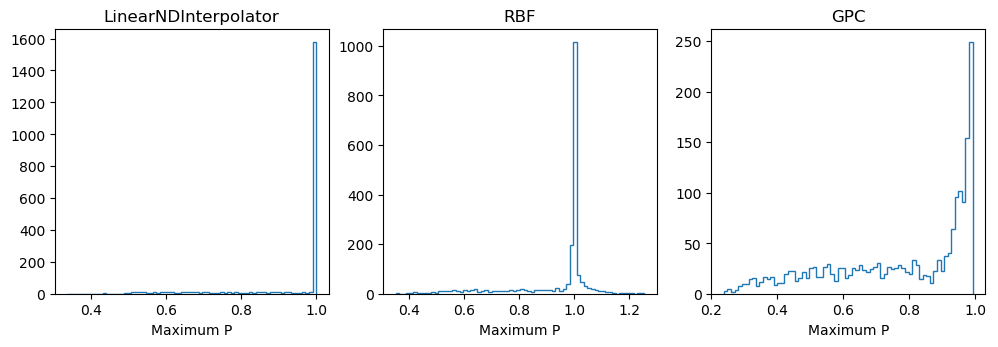

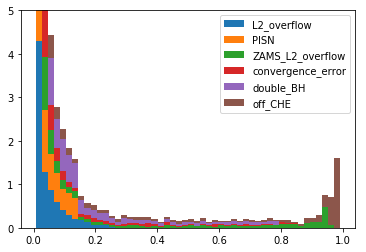

In [168]:
#plot_this = [np.max(probs_lin, axis=1), np.max(probs_rbf, axis=1), np.max(probs_gp, axis=1) ]

fig, subs = plt.subplots(1,3, dpi=100, figsize=(12,3.5))

subs[0].hist( np.max(probs_lin, axis=1), bins=70, density = None, histtype = 'step' )
subs[0].set_title("LinearNDInterpolator")
subs[1].hist( np.max(probs_rbf, axis=1), bins=70, density = None, histtype = 'step' )
subs[1].set_title("RBF")
subs[2].hist( np.max(probs_gp, axis=1), bins=70, density = None, histtype = 'step' )
subs[2].set_title("GPC")

subs[0].set_xlabel("Maximum P")
subs[1].set_xlabel("Maximum P")
subs[2].set_xlabel("Maximum P")

plt.show()

#print(table_object.class_id_mapping)
#for class_probs in probs_gp.T:
plt.hist( probs_gp, bins = 50, histtype = 'barstacked', density = True,
         label = ['L2_overflow', 'PISN', 'ZAMS_L2_overflow', 'convergence_error', 'double_BH', 'off_CHE'] )
plt.ylim(0,5)
plt.legend(loc='best')
plt.show()

### Some subtleties:

1. RBF does not necessarily return values in the range [0,1].
2. If you just take the max() it works....
3. Some 'probabilities' will be negative and greater than 1.
4. If you take the class with max it will choose a class. Is it the right class? Not sure.


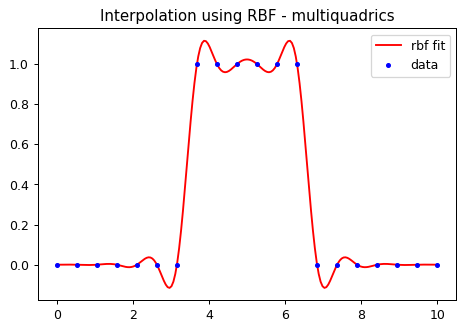

In [246]:
import numpy as np
from scipy.interpolate import Rbf

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

# setup data

x = np.linspace(0, 10, 20)
y = np.concatenate( (np.zeros(7), \
                      np.ones(6), \
                     np.zeros(7) ) )
xi = np.linspace(0, 10, 200)

# use RBF method
rbf = Rbf(x, y, )
fi = rbf( xi )

plt.figure(dpi=90)
plt.plot(xi, fi, 'r', label = 'rbf fit')
plt.plot(x, y, 'b.', label = 'data')
plt.title('Interpolation using RBF - multiquadrics')
plt.legend(loc = 'best')
plt.show()


In [56]:
## interpolate points outside of range instead of nan ?
## plots
## 
## 1. maybe set up github - start committing
## 2. regression: gps

## scipy rbf interpolator
## passing triangulation to NDinterpolator

## checks for probability
## global options for debugging (for later)

In [98]:
import importlib
importlib.reload( regress )
regr_obj = regress.Regressor( table_object )


col_keys = regr_obj.regr_dfs_per_class["double_BH"].keys()
col_keys = col_keys[1:3] #col_keys[1:2]

regr_names = ["linear", 'rbf', "gp"]

p_diff_dict = {}
attr_dict = {}
p_diff_lin_holder = []
p_diff_gp_holder = []
for i in range(0,300):
    print("\t", i)
    for name in regr_names:
        p_diffs, attr_holder = regr_obj.mult_diffs( name, "double_BH", col_keys, 0.05, 0.05, verbose = False )
        p_diff_dict[name] = p_diffs
        attr_dict[name] = attr_holder
        if name == "linear":
            p_diff_lin_holder.append( p_diffs )
        if name == "gp":
            p_diff_gp_holder.append( p_diffs )

print( np.shape(p_diff_lin_holder) )

	 0
LinearNDInterpolator : 520 nan points out of 3130. Used rbf instead.
LinearNDInterpolator : 506 nan points out of 3130. Used rbf instead.
	 1
LinearNDInterpolator : 637 nan points out of 3130. Used rbf instead.
LinearNDInterpolator : 438 nan points out of 3130. Used rbf instead.
	 2
LinearNDInterpolator : 488 nan points out of 3130. Used rbf instead.
LinearNDInterpolator : 636 nan points out of 3130. Used rbf instead.
	 3
LinearNDInterpolator : 428 nan points out of 3130. Used rbf instead.
LinearNDInterpolator : 486 nan points out of 3130. Used rbf instead.
	 4
LinearNDInterpolator : 601 nan points out of 3130. Used rbf instead.
LinearNDInterpolator : 683 nan points out of 3130. Used rbf instead.
	 5
LinearNDInterpolator : 371 nan points out of 3130. Used rbf instead.
LinearNDInterpolator : 382 nan points out of 3130. Used rbf instead.
	 6
LinearNDInterpolator : 476 nan points out of 3130. Used rbf instead.
LinearNDInterpolator : 473 nan points out of 3130. Used rbf instead.
	 7
Li

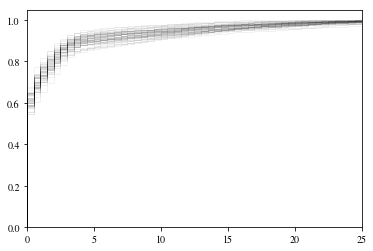

In [108]:
#print( np.shape(p_diff_lin_holder) )
con_p_diff_lin = np.concatenate( p_diff_lin_holder, axis = 1 )
#print( np.shape(con_p_diff_lin) )
con_p_diff_gp = np.concatenate( p_diff_gp_holder, axis = 1 )

for i in range(0,60):
    plt.hist( abs(p_diff_lin_holder[i*5][0]), bins= 200, histtype = 'step', \
                 density = True, range=(0,100),label = 'LinearNDInterpolator', cumulative = True,
              alpha = 0.05, color = 'k')
plt.xlim(0,25)


plt.show()

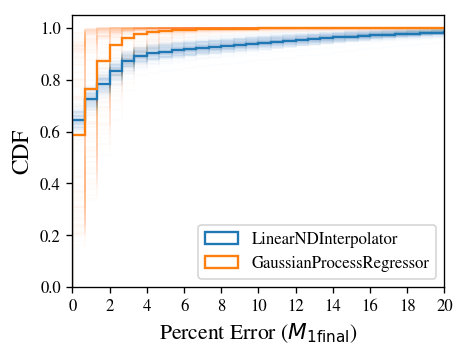

In [153]:
plt.rcParams['font.family'] = 'stixgeneral'

plt.figure( figsize=(4,3), dpi=120)

n_bins = 150

for i in range(0,150):
    plt.hist( abs(p_diff_lin_holder[i*2][0]), bins= n_bins, histtype = 'step', \
                 density = True, range=(0,100), cumulative = True,
              alpha = 0.01, color = 'C0')
    
for i in range(0,150):
    plt.hist( abs(p_diff_gp_holder[i*2][0]), bins= n_bins, histtype = 'step', \
                 density = True, range=(0,100), cumulative = True,
              alpha = 0.01, color = 'C1')


plt.hist( abs(con_p_diff_lin[0]), bins= n_bins, histtype = 'step', \
             density = True, range=(0,100),label = 'LinearNDInterpolator', 
          cumulative = True, linestyle = '-', linewidth = 1.4)
plt.hist( abs(con_p_diff_gp[0]), bins= n_bins, histtype = 'step', \
         density = True, range=(0,100), label = 'GaussianProcessRegressor', 
         cumulative = True, linestyle = '-', linewidth = 1.4 )


plt.xlabel(r"Percent Error ($M_{1 {\rm final}}$)", fontsize = 13)
plt.ylabel("CDF", fontsize = 14)
plt.legend(loc='lower right')
plt.xlim(0,20)
#plt.yscale('log')
plt.xticks( np.arange(0,20+1,2) )
#plt.savefig("regression_results.pdf", bbox_inches = 'tight')
plt.show()


[3130, 3130, 3130]


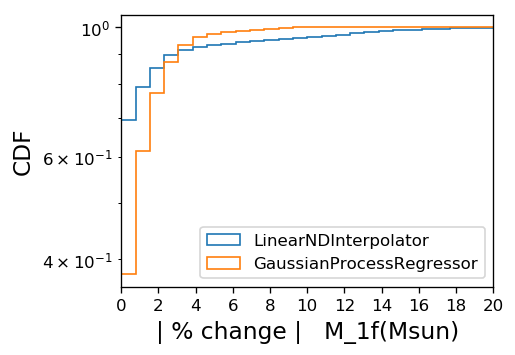

[3130, 3060, 3130]


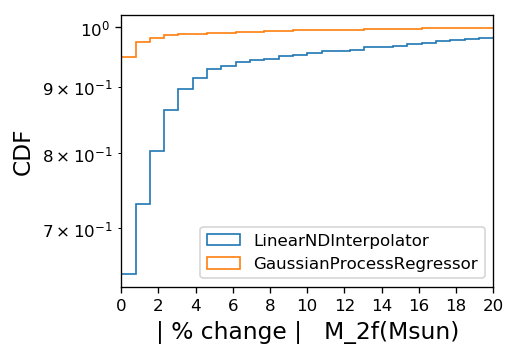

In [42]:


for i in range( len(p_diff_dict["linear"]) ):
    this_list = [ np.sum(abs(p_diff_dict[ var ][i]) <= 100) for var in ["linear", "rbf", "gp"] ]
    print( this_list )
    plt.figure(figsize=(4,3),dpi=120)
    plt.hist( abs(p_diff_dict["linear"][i]), bins= 130, histtype = 'step', \
             density = True, range=(0,100),label = 'LinearNDInterpolator', cumulative = True,
            )
    #plt.hist( abs(p_diff_dict["rbf"][i]), bins= 100, histtype = 'step', \
    #         density = True, range=(0,100), label = 'rbf', cumulative = True)
    plt.hist( abs(p_diff_dict["gp"][i]), bins= 130, histtype = 'step', \
             density = True, range=(0,100), label = 'GaussianProcessRegressor', cumulative = True )
    plt.xlabel( r"| % change |   " + col_keys[i], fontsize = 14 )
    plt.ylabel("CDF", fontsize = 14)
    plt.legend( loc='lower right', fontsize = 10 )
    
    plt.xlim(0,20)
    #plt.ylim(1e-1, 1e0)
    plt.yscale('log')
    plt.xticks( np.arange(0,20+1,2) )
    plt.show()



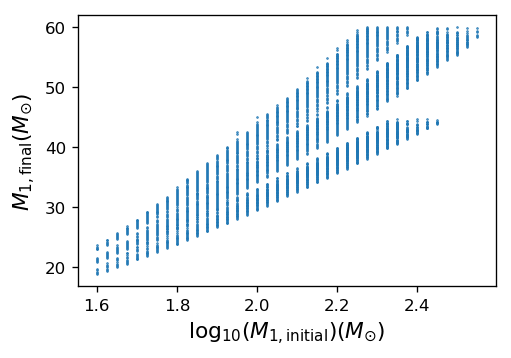

In [32]:

regr_obj = regress.Regressor( table_object )

inputs = regr_obj.input_dict["double_BH"]
outputs = regr_obj.regr_dfs_per_class["double_BH"]

x = np.array(inputs["log10(M_1i)(Msun)"]).astype(float)
y = np.array(outputs["M_1f(Msun)"]).astype(float)


x_df0 = np.array(inputs["log10(M_1i)(Msun)"]['df0']).astype(float)
y_df0 = np.array(outputs["M_1f(Msun)"]['df0']).astype(float)
x_df1 = np.array(inputs["log10(M_1i)(Msun)"]['df1']).astype(float)
y_df1 = np.array(outputs["M_1f(Msun)"]['df1']).astype(float)
x_df2 = np.array(inputs["log10(M_1i)(Msun)"]['df2']).astype(float)
y_df2 = np.array(outputs["M_1f(Msun)"]['df2']).astype(float)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label = 'logZ = -2.500',
                        markerfacecolor='C0', markersize=7),
                   plt.Line2D([0], [0], marker='o', color='w', label = 'logZ = -2.625',
                        markerfacecolor='C1', markersize=7),
                  plt.Line2D([0], [0], marker='o', color='w', label = 'logZ = -2.750',
                        markerfacecolor='C2', markersize=7)]

plt.figure(figsize=(4.5,3),dpi=120)
#plt.scatter( x_df0, y_df0, s=1.5, marker='.' )
#plt.scatter( x_df1, y_df1, s=1.5, marker='.' )
#plt.scatter( x_df2, y_df2, s=1.5, marker='.' )
plt.plot(x,y, '.', markersize = 1)
plt.xlabel(r"$\log_{10}(M_{1,{\rm initial}}) (M_{\odot})$", fontsize = 13)
plt.ylabel(r"$M_{1,{\rm final}} (M_{\odot})$", fontsize = 13)
#plt.legend( handles = legend_elements,loc='best', fontsize = 10, )
plt.savefig( "regress_data.pdf", bbox_inches = 'tight')
plt.show()

In [43]:
import pandas as pd
import time as time
import matplotlib.pyplot as plt



In [ ]:
import importlib
importlib.reload( data )
importlib.reload( classify )
importlib.reload( regress )

classify_obj_2 = classify.Classifier( table_object )

fracs = [0.005, 0.006]
N_iterations = 300
interp_type = ['linear', 'rbf', 'gp']

classify_obj_2.make_cv_plot_data( interp_type, fracs, N_iterations )

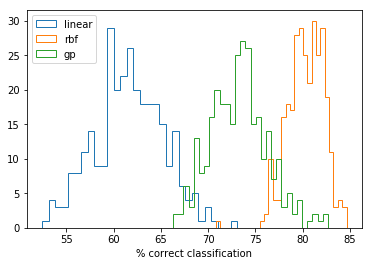

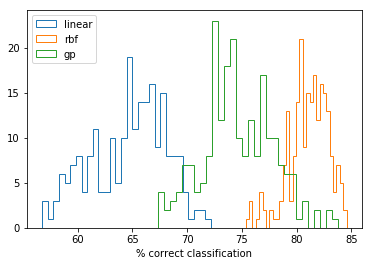

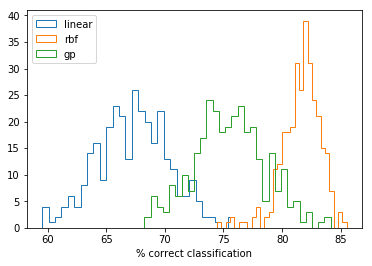

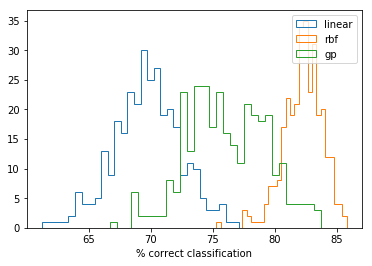

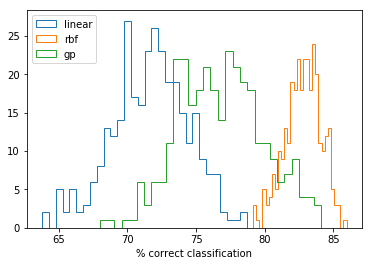

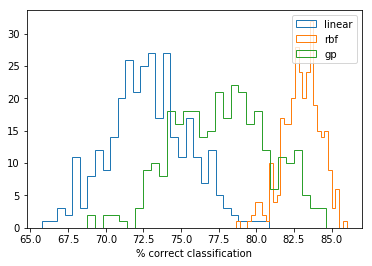

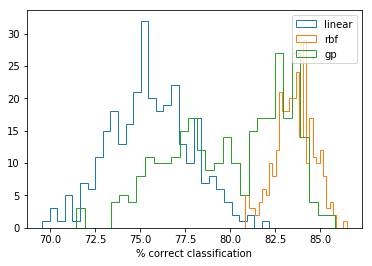

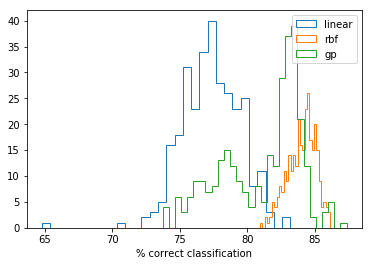

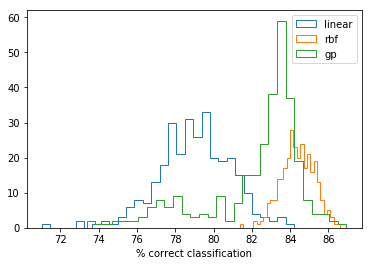

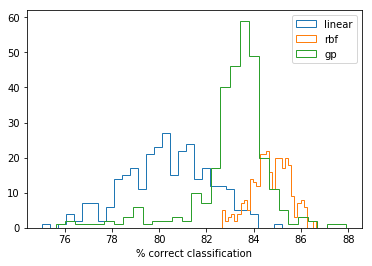

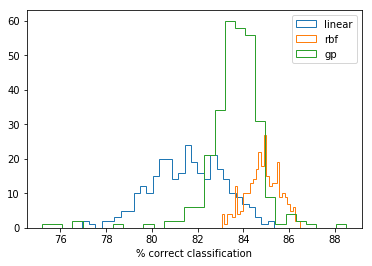

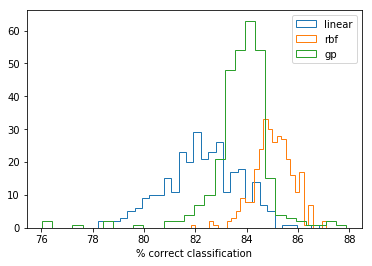

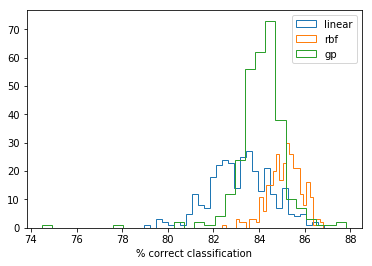

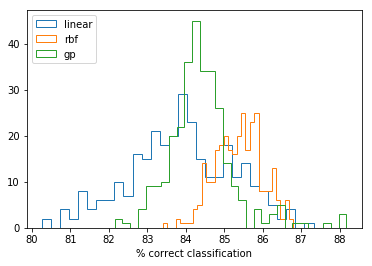

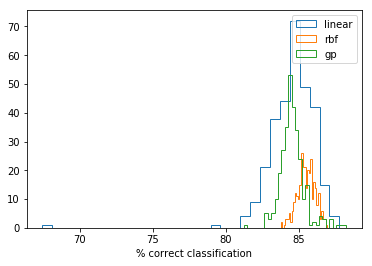

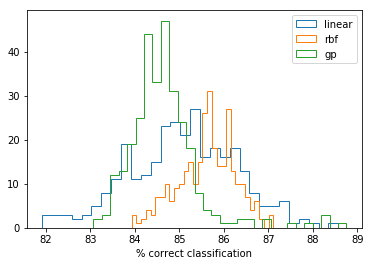

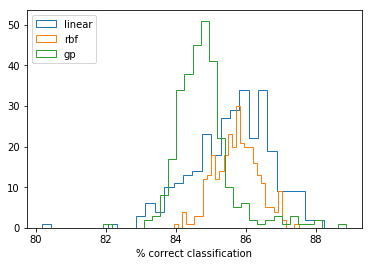

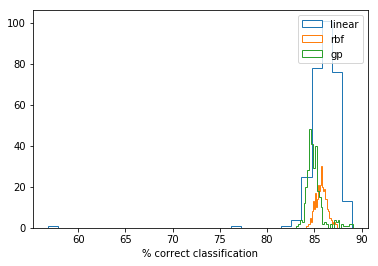

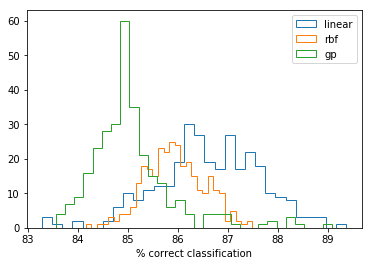

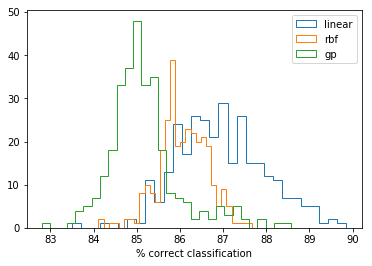

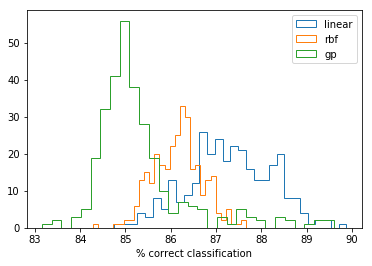

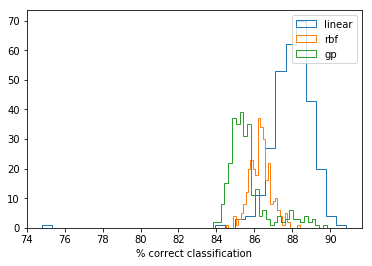

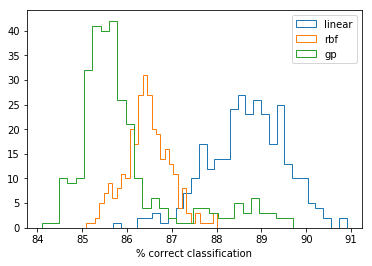

In [9]:
files = ["cv_data/cross_val_data_f0.005",
        "cv_data/cross_val_data_f0.006",
        "cv_data/cross_val_data_f0.007",
        "cv_data/cross_val_data_f0.008",
        "cv_data/cross_val_data_f0.009",
        "cv_data/cross_val_data_f0.01",
        "cv_data/cross_val_data_f0.012",
        "cv_data/cross_val_data_f0.014",
        "cv_data/cross_val_data_f0.016",
        "cv_data/cross_val_data_f0.018",
        "cv_data/cross_val_data_f0.02",
        "cv_data/cross_val_data_f0.022",
        "cv_data/cross_val_data_f0.024",
        "cv_data/cross_val_data_f0.026",
        "cv_data/cross_val_data_f0.028",
        "cv_data/cross_val_data_f0.03",
        "cv_data/cross_val_data_f0.032",
        "cv_data/cross_val_data_f0.034",
        "cv_data/cross_val_data_f0.036",
        "cv_data/cross_val_data_f0.038",
        "cv_data/cross_val_data_f0.04",
        "cv_data/cross_val_data_f0.045",
        "cv_data/cross_val_data_f0.05"]

cv_means_lin = []
cv_means_rbf = []
cv_means_gp = []

d_frac = [0.005, 0.006, 0.007, 0.008, 0.009, 0.01,
          0.012, 0.014, 0.016, 0.018, 0.02,
          0.022, 0.024, 0.026, 0.028, 0.03,
          0.032, 0.034, 0.036, 0.038, 0.04,
          0.045, 0.05]

interp_type = ['linear', 'rbf', 'gp']

for path in files:
    
    cross_df = pd.read_csv( path )

    for interp_str in interp_type:
        #print( len(cross_df[interp_str]) )
        plt.hist( cross_df[interp_str], bins = 30, histtype = 'step', label = interp_str )
        
    cv_means_lin.append( np.mean( cross_df[interp_type[0]] ) )
    cv_means_rbf.append( np.mean( cross_df[interp_type[1]] ) )
    cv_means_gp.append(  np.mean( cross_df[interp_type[2]] ) )
    
    plt.xlabel("% correct classification")
    plt.legend(loc='best')
    plt.show()

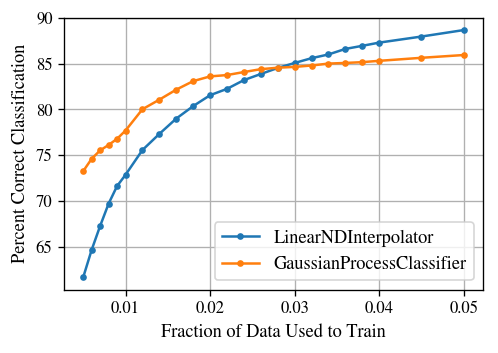

In [86]:
plt.rcParams['font.family'] = 'stixgeneral'

plt.figure( figsize=(4.5,3),dpi=120)
plt.plot( d_frac, cv_means_lin, '.-', label = 'LinearNDInterpolator')
#plt.plot( d_frac, cv_means_rbf, '.-', label = 'rbf')
plt.plot( d_frac,  cv_means_gp, '.-', label = 'GaussianProcessClassifier')
plt.ylabel("Percent Correct Classification", fontsize = 11)
plt.xlabel("Fraction of Data Used to Train", fontsize = 11)

plt.legend(loc = 'lower right', fontsize=11)
plt.grid(True)
plt.savefig("classification_results.pdf", bbox_inches = 'tight')
plt.show()

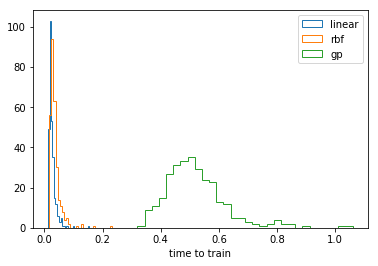

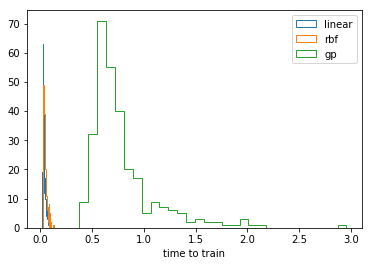

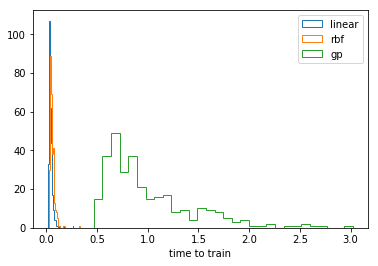

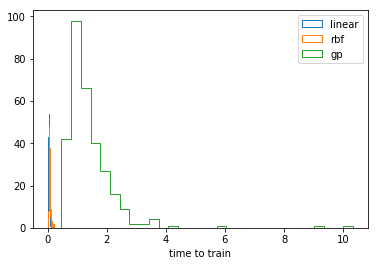

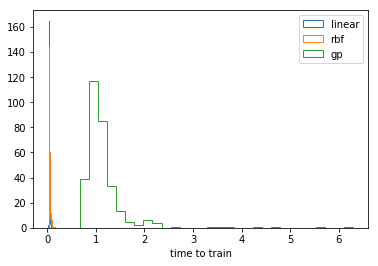

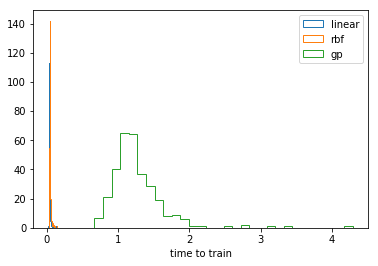

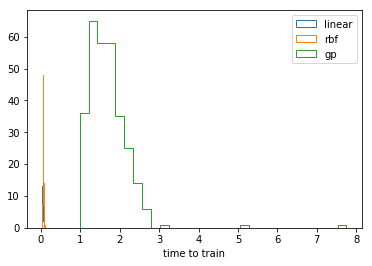

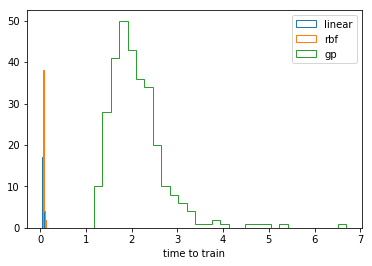

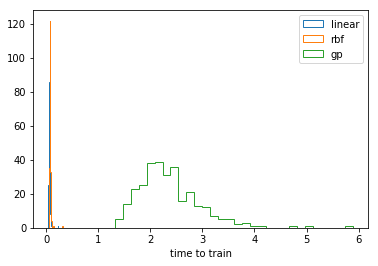

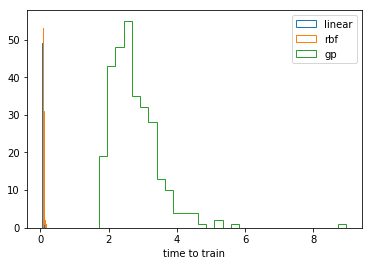

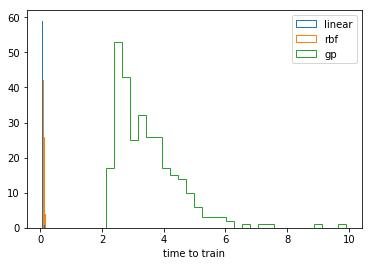

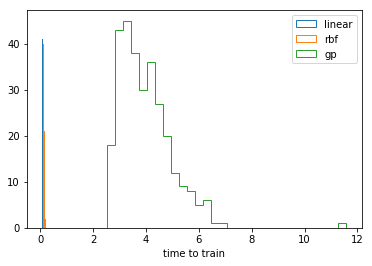

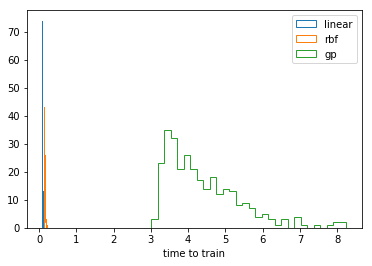

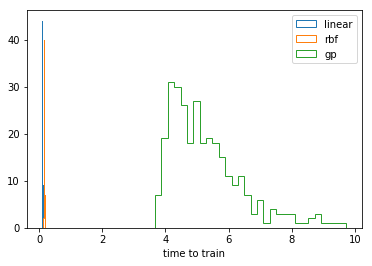

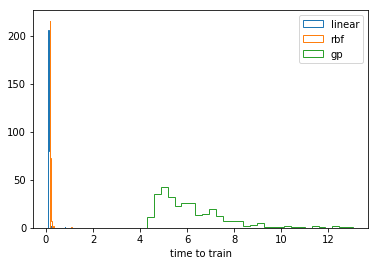

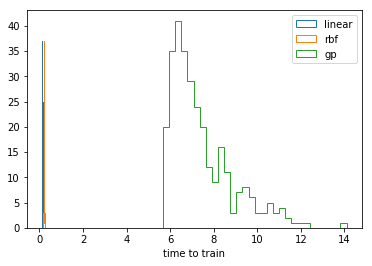

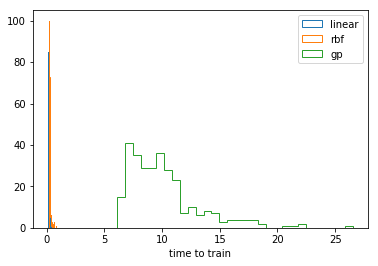

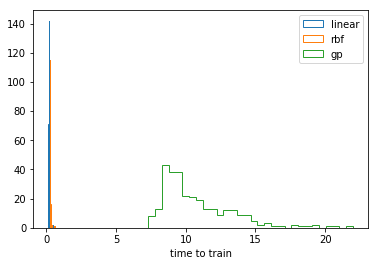

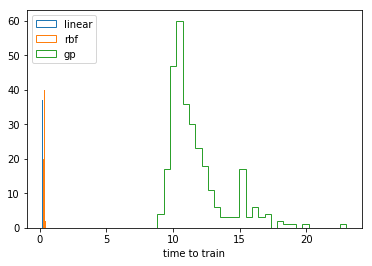

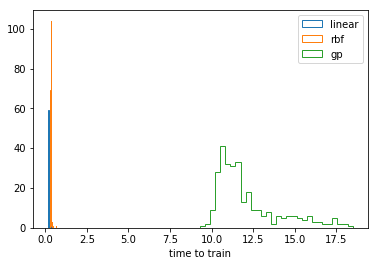

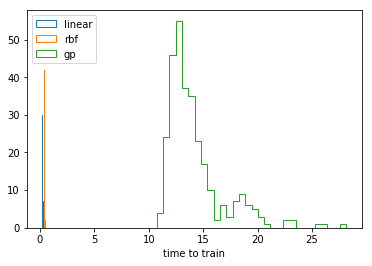

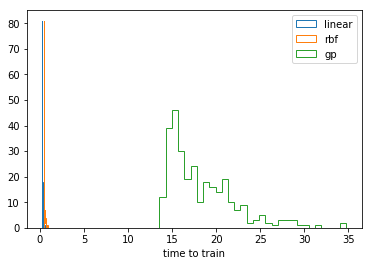

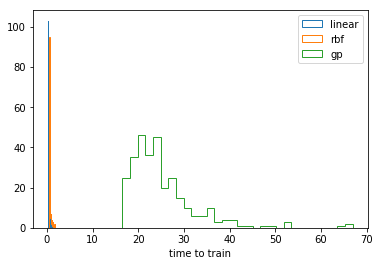

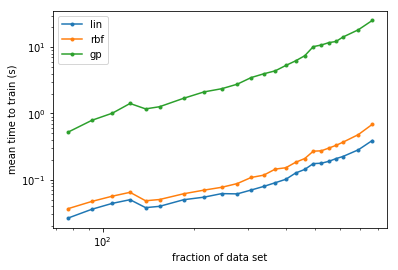

In [68]:
files = ["cv_data/timing_data_f0.005",
        "cv_data/timing_data_f0.006",
        "cv_data/timing_data_f0.007",
        "cv_data/timing_data_f0.008",
        "cv_data/timing_data_f0.009",
        "cv_data/timing_data_f0.01",
        "cv_data/timing_data_f0.012",
        "cv_data/timing_data_f0.014",
        "cv_data/timing_data_f0.016",
        "cv_data/timing_data_f0.018",
        "cv_data/timing_data_f0.02",
        "cv_data/timing_data_f0.022",
        "cv_data/timing_data_f0.024",
        "cv_data/timing_data_f0.026",
        "cv_data/timing_data_f0.028",
        "cv_data/timing_data_f0.03",
        "cv_data/timing_data_f0.032",
        "cv_data/timing_data_f0.034",
        "cv_data/timing_data_f0.036",
        "cv_data/timing_data_f0.038",
        "cv_data/timing_data_f0.04",
        "cv_data/timing_data_f0.045",
        "cv_data/timing_data_f0.05"]

t_means_lin = []
t_means_rbf = []
t_means_gp = []

d_frac = [0.005, 0.006, 0.007, 0.008, 0.009, 0.01, \
          0.012, 0.014, 0.016, 0.018, 0.02,
          0.022, 0.024, 0.026, 0.028, 0.03,
          0.032, 0.034, 0.036, 0.038, 0.04,
          0.045, 0.05]

N_points = np.array(d_frac) * len( classify_obj_2.input_data )


np.array()
for path in files:
    
    times_df = pd.read_csv( path )

    for interp_str in interp_type:
        #print( len(cross_df[interp_str]) )
        plt.hist( times_df[interp_str], bins = 30, histtype = 'step', label = interp_str )
        
    plt.xlabel("time to train")
    plt.legend(loc='best')
    plt.show()

    
    t_means_lin.append( np.mean( times_df[interp_type[0]] ) )
    t_means_rbf.append( np.mean( times_df[interp_type[1]] ) )
    t_means_gp.append(  np.mean( times_df[interp_type[2]] ) )

x_axis = N_points
#x_axis = d_frac

plt.plot(x_axis, t_means_lin,'.-', label = 'lin')
plt.plot(x_axis, t_means_rbf,'.-', label = 'rbf')
plt.plot(x_axis, t_means_gp, '.-', label = 'gp')
plt.ylabel("mean time to train (s)")
plt.xlabel("fraction of data set")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
plt.show()
